In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
from sklearn.model_selection import train_test_split
from time import time
import seaborn as sns
from tqdm import tqdm

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alejandro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
df_train = pd.read_csv('loaded-reviews.csv')
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,"Unlike Next, which we'd eaten at the previous ...",N,Scott E.,"Glengary, WV",...,11,48,5,41,5,5,2,0,1,4.5
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,Probably one of the best meals I've had ever. ...,N,Jerry K.,"Palos Verdes Peninsula, CA",...,0,4,0,0,0,0,0,0,0,4.5
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,Service was impeccable. Experience and present...,N,Patricia M.,"Chicago, IL",...,2,11,0,6,0,1,0,0,0,4.5
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,"The problem with places like this, given the e...",N,Terry N.,"San Jose, CA",...,84,60,1,35,8,6,6,11,0,4.5
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,I have no idea how to write my review - dining...,N,Shradha Vegetarianista A.,"Chicago, IL",...,333,1209,61,1650,679,417,283,22,70,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26953,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,3/17/2010,4,0,"It's Taco Bell, with higher prices, but it's T...",N,Kristen F.,"Chicago, IL",...,31,165,33,201,56,17,24,0,3,4.0
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5,0,Yellow Rose is a favorite of mine. I'd go ther...,N,Yvonne F.,IL,...,6,11,2,7,2,0,1,0,1,4.0
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3,0,Not bad. We ate there because the odd wicker s...,N,Saverio T.,"Chicago, IL",...,13,49,7,58,9,10,7,1,1,4.0
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3,0,We were surprised to have been eagerly roped i...,N,Saverio T.,"Chicago, IL",...,13,49,7,58,9,10,7,1,1,4.0


In [6]:
print("Filas:", df_train.shape[0])
print("Columnas:", df_train.shape[1])
print("\nTipos de datos:")
print(df_train.dtypes.value_counts())

Filas: 26958
Columnas: 21

Tipos de datos:
int64      11
object      9
float64     1
Name: count, dtype: int64


In [7]:
# Revisamos valores nulos
print("\nValores nulos por columna:")
print(df_train.isnull().sum())

# Solo hay 3 nulos que nos afectan, asi que los borramos
# Eliminar las filas con reviewID o reviewContent nulos (son 3 en total)
df_train = df_train.dropna(subset=['reviewID', 'reviewContent']).reset_index(drop=True)

# Convertimos 'flagged' en variable binaria (Y -> 1, N -> 0)
df_train['flagged'] = (df_train['flagged'] == 'Y').astype(int)

# Convertimos 'date' a tipo datetime
df_train['date'] = pd.to_datetime(df_train['date'], errors='coerce')


Valores nulos por columna:
reviewID             1
reviewerID           0
restaurantID         0
date                 0
rating               0
reviewUsefulCount    0
reviewContent        2
flagged              0
name                 0
location             9
yelpJoinDate         0
friendCount          0
reviewCount          0
firstCount           0
usefulCount          0
coolCount            0
funnyCount           0
complimentCount      0
tipCount             0
fanCount             0
restaurantRating     0
dtype: int64


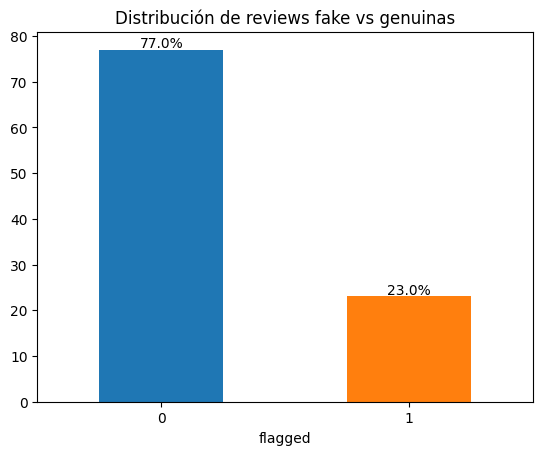

In [8]:
ax = df_train['flagged'].value_counts(normalize=True).mul(100).plot(
    kind='bar',
    color=['C0', 'C1'],
    title='Distribución de reviews fake vs genuinas',
    rot=0
)
for i, v in enumerate(df_train['flagged'].value_counts(normalize=True).mul(100)):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')
#Se observa una distribucion desigual

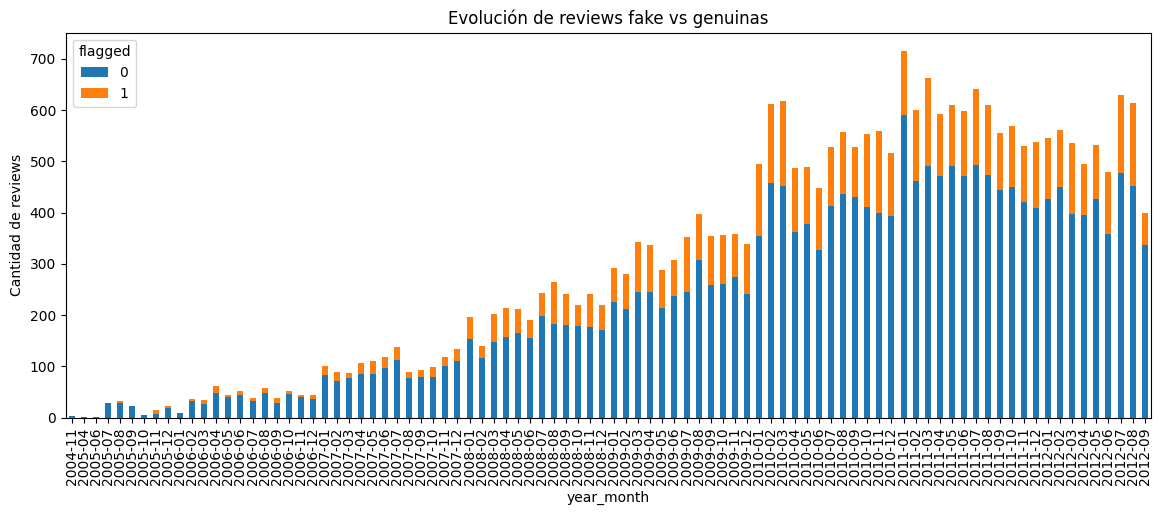

In [9]:
df_train['date'] = pd.to_datetime(df_train['date'], errors='coerce')
df_train['year_month'] = df_train['date'].dt.to_period('M')
monthly = df_train.groupby(['year_month', 'flagged']).size().unstack()
monthly.plot(kind='bar', stacked=True, figsize=(14,5), title='Evolución de reviews fake vs genuinas')
plt.ylabel('Cantidad de reviews')
plt.show()


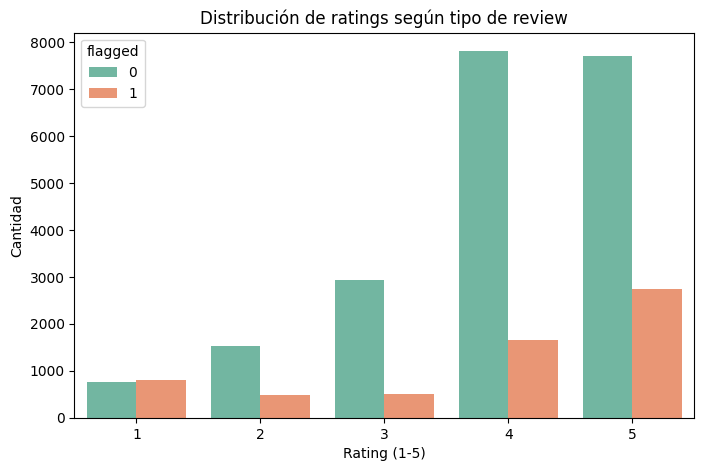

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x='rating', hue='flagged', palette='Set2')
plt.title("Distribución de ratings según tipo de review")
plt.xlabel("Rating (1-5)")
plt.ylabel("Cantidad")
plt.show()

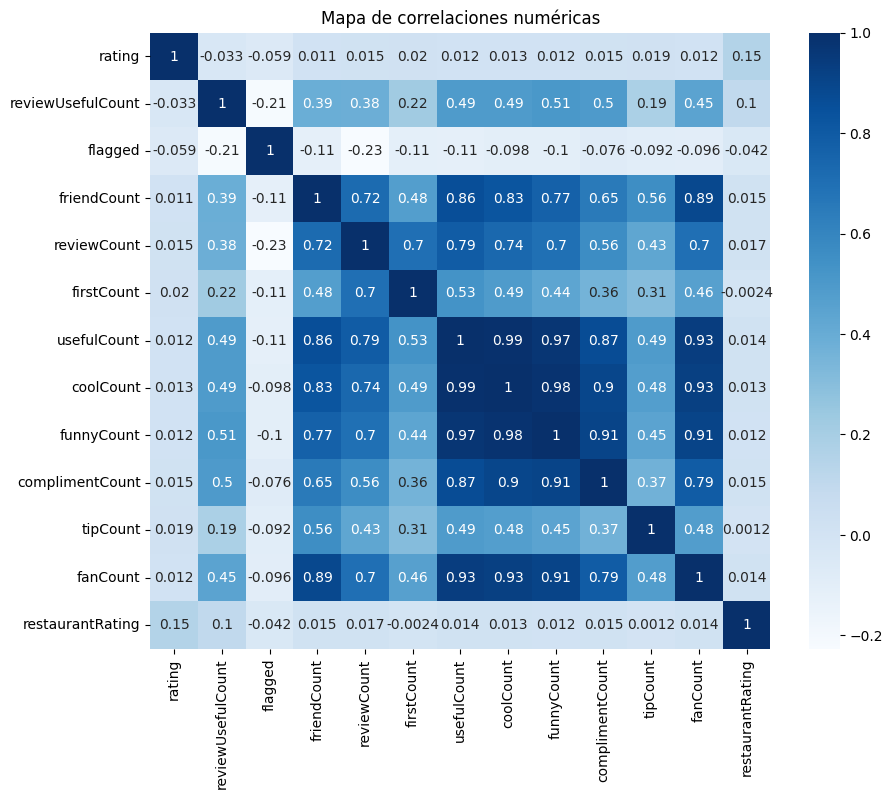

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Mapa de correlaciones numéricas')
plt.show()

Estadísticos descriptivos de la longitud de las reviews:
count    26955.000000
mean       133.391059
std        119.161100
min          1.000000
25%         53.000000
50%        100.000000
75%        175.500000
max        971.000000
Name: ReviewLength, dtype: float64


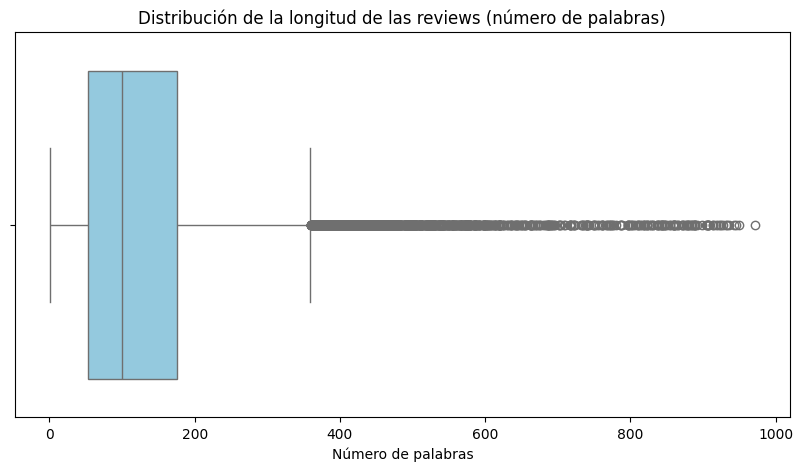

In [12]:
#Creamos una columna ReviewLength, para balancear
df_train['ReviewLength'] = df_train['reviewContent'].astype(str).apply(lambda x: len(x.split()))

# Verificamos la distribución estadística
print("Estadísticos descriptivos de la longitud de las reviews:")
print(df_train['ReviewLength'].describe())

# Boxplot de longitud
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['ReviewLength'], color='skyblue')
plt.title("Distribución de la longitud de las reviews (número de palabras)")
plt.xlabel("Número de palabras")
plt.show()

In [13]:
# Definimos el umbral (usamos la mediana como referencia)
threshold = df_train['ReviewLength'].median()
print(f"\nUmbral para clasificar long/short: {threshold:.0f} palabras")

# Creamos la nueva columna según el umbral
df_train['review_length_label'] = np.where(
    df_train['ReviewLength'] >= threshold,
    'Long Review',
    'Short Review'
)

# Verificamos la cantidad de cada tipo
df_train['review_length_label'].value_counts()


Umbral para clasificar long/short: 100 palabras


review_length_label
Long Review     13501
Short Review    13454
Name: count, dtype: int64

In [14]:
# Dividimos el dataset en genuinas y fake
target_0_df = df_train[df_train['flagged'] == 0]  # genuinas
target_1_df = df_train[df_train['flagged'] == 1]  # fake

# Calculamos proporciones normalizadas
target_0_prop = target_0_df['review_length_label'].value_counts(normalize=True).sort_index()
target_1_prop = target_1_df['review_length_label'].value_counts(normalize=True).sort_index()

print("Proporciones por tipo de review:")
print("Genuinas:\n", target_0_prop)
print("\nFakes:\n", target_1_prop)


Proporciones por tipo de review:
Genuinas:
 review_length_label
Long Review     0.545179
Short Review    0.454821
Name: proportion, dtype: float64

Fakes:
 review_length_label
Long Review     0.352676
Short Review    0.647324
Name: proportion, dtype: float64


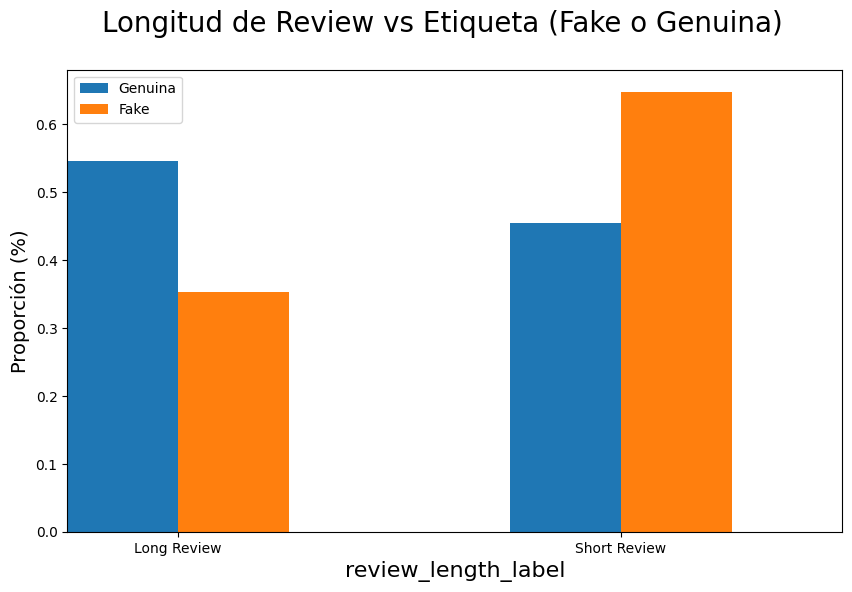

In [15]:
width = 0.25
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Longitud de Review vs Etiqueta (Fake o Genuina)', fontsize=20)
plt.xlabel('Tipo de Review', fontsize=16)
plt.ylabel('Proporción (%)', fontsize=14)

# Graficamos proporciones
target_0_prop.plot(kind='bar', position=1, width=width, label='Genuina', color='C0')
target_1_prop.plot(kind='bar', position=0, width=width, label='Fake', color='C1')

plt.legend()
plt.xticks(rotation=0)
plt.show()

### 1. Preprocesamiento final del texto
En esta sección normalizamos `reviewContent`(lowercase, tokenización por regex, limpieza de signos, stopwords y lematización) para generar `reviewContent_clean`, que servirá como base única para las demás etapas.

In [ ]:
import importlib
import string

required_packages = ["sentence_transformers", "lightgbm", "xgboost"]
missing_packages = [pkg for pkg in required_packages if importlib.util.find_spec(pkg) is None]
if missing_packages:
    %pip install -q "sentence-transformers>=2.7.0" "lightgbm>=4.1.0" "xgboost>=2.0.0"

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
custom_stopwords = {"alinea", "restaurant", "food", "dinner"}
stop_words.update(custom_stopwords)
tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
lemmatizer = WordNetLemmatizer()


def normalize_text(text: str) -> str:
    """Aplica minúsculas, tokenización, limpieza y lematización a un texto."""
    if not isinstance(text, str):
        return ""
    tokens = tokenizer.tokenize(text.lower())
    clean_tokens = []
    for tok in tokens:
        if tok in stop_words or len(tok) <= 2:
            continue
        lemma = lemmatizer.lemmatize(tok)
        clean_tokens.append(lemma)
    return " ".join(clean_tokens)


# Respetamos columnas existentes y solo las creamos si hiciera falta
if 'ReviewLength' not in df_train.columns:
    df_train['ReviewLength'] = df_train['reviewContent'].astype(str).apply(lambda x: len(x.split()))

# Columna final para NLP
df_train['reviewContent_clean'] = df_train['reviewContent'].astype(str).apply(normalize_text)
df_train['review_word_count'] = df_train['ReviewLength']

print("Vista previa de la normalización:")
df_train[['reviewContent', 'reviewContent_clean']].head()


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alejandro\AppData\Roaming\nltk_data...


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Alejandro\AppData\Roaming\nltk_data...


Vista previa de la normalización:


,reviewContent,reviewContent_clean
0,"Unlike Next, which we'd eaten at the previous ...",unlike next eaten previous night dish complete...
1,Probably one of the best meals I've had ever. ...,probably one best meal ever performance grant ...
2,Service was impeccable. Experience and present...,service impeccable experience presentation coo...
3,"The problem with places like this, given the e...",problem place like given exhorbitant cost medi...
4,I have no idea how to write my review - dining...,idea write review dining brings whole differen...


### 2. Vectorización del texto (NLP)
Construimos representaciones BoW y TF-IDF (1-2 gram) junto con embeddings BERT para disponer de `X_bow`, `X_tfidf` y `X_bert`, manteniendo un `train/test split` estratificado para los modelos supervisados.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

y = df_train['flagged']
train_idx, test_idx = train_test_split(
    df_train.index,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

text_splits = {
    'train_idx': train_idx,
    'test_idx': test_idx,
    'y_train': y.loc[train_idx],
    'y_test': y.loc[test_idx]
}

X_train_text = df_train.loc[train_idx, 'reviewContent_clean']
X_test_text = df_train.loc[test_idx, 'reviewContent_clean']

bow_vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=5, max_features=5000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_features=5000)

X_train_bow = bow_vectorizer.fit_transform(X_train_text)
X_test_bow = bow_vectorizer.transform(X_test_text)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Matrices completas (vocabulos aprendidos solo con train)
X_bow = bow_vectorizer.transform(df_train['reviewContent_clean'])
X_tfidf = tfidf_vectorizer.transform(df_train['reviewContent_clean'])

print(f"BoW -> train: {X_train_bow.shape}, test: {X_test_bow.shape}")
print(f"TF-IDF -> train: {X_train_tfidf.shape}, test: {X_test_tfidf.shape}")

BoW -> train: (21564, 5000), test: (5391, 5000)
TF-IDF -> train: (21564, 5000), test: (5391, 5000)


In [18]:
from sentence_transformers import SentenceTransformer
import numpy as np

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_bert = bert_model.encode(
    df_train['reviewContent_clean'].tolist(),
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True
)

# Recuperamos posiciones de train/test dentro de la matriz completa
train_positions = df_train.index.get_indexer(train_idx)
test_positions = df_train.index.get_indexer(test_idx)

X_train_bert = X_bert[train_positions]
X_test_bert = X_bert[test_positions]

print(f"BERT embeddings -> full: {X_bert.shape}")

C:\Users\Alejandro\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Alejandro\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alejandro\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python a

BERT embeddings -> full: (26955, 384)


### 3. Preparación del dataset estructurado para detección de bots
Creamos las características longitud, mayúsculas, signos, densidad de palabras únicas, ratio `usefulCount/reviewCount`, antigüedad del usuario y las combinamos con señales demográficas/actividad; posteriormente escalamos con `StandardScaler` y generamos `X_structured_train/test` y `y_structured_train/test`.

In [19]:
from sklearn.preprocessing import StandardScaler

def engineer_structured_features(input_df: pd.DataFrame) -> pd.DataFrame:
    data = input_df.copy()
    text_series = data['reviewContent'].astype(str)
    clean_series = data['reviewContent_clean'] if 'reviewContent_clean' in data.columns else text_series.apply(normalize_text)
    word_counts = data['ReviewLength'] if 'ReviewLength' in data.columns else text_series.apply(lambda x: len(x.split()))

    punct_set = set(string.punctuation)

    features = pd.DataFrame(index=data.index)
    features['review_length_words'] = word_counts
    features['uppercase_count'] = text_series.apply(lambda x: sum(1 for ch in x if ch.isupper()))
    features['punctuation_count'] = text_series.apply(lambda x: sum(1 for ch in x if ch in punct_set))
    features['unique_word_density'] = clean_series.apply(lambda x: len(set(x.split())) / max(len(x.split()), 1))
    features['useful_review_ratio'] = (
        data['usefulCount'] / data['reviewCount'].replace({0: np.nan})
    ).fillna(0)

    review_dates = pd.to_datetime(data['date'], errors='coerce')
    join_dates = pd.to_datetime(data['yelpJoinDate'], errors='coerce')
    features['user_antiquity_years'] = ((review_dates - join_dates).dt.days / 365.25).clip(lower=0).fillna(0)

    # Señales adicionales de actividad del usuario
    aux_cols = [
        'friendCount', 'reviewCount', 'usefulCount', 'coolCount', 'funnyCount',
        'complimentCount', 'tipCount', 'fanCount', 'reviewUsefulCount', 'rating', 'restaurantRating'
    ]
    for col in aux_cols:
        features[col] = data[col]

    return features.fillna(0)


structured_features = engineer_structured_features(df_train)
structured_feature_cols = structured_features.columns.tolist()

structured_scaler = StandardScaler()
X_structured_train = structured_scaler.fit_transform(structured_features.loc[train_idx])
X_structured_test = structured_scaler.transform(structured_features.loc[test_idx])
X_structured_full = structured_scaler.transform(structured_features)

y_structured_train = y.loc[train_idx]
y_structured_test = y.loc[test_idx]

print(f"Structured features shape: {structured_features.shape}")
structured_features.head()

Structured features shape: (26955, 17)


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_4696\396252417.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  join_dates = pd.to_datetime(data['yelpJoinDate'], errors='coerce')


,review_length_words,uppercase_count,punctuation_count,unique_word_density,useful_review_ratio,user_antiquity_years,friendCount,reviewCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,reviewUsefulCount,rating,restaurantRating
0,871,53,143,0.696759,0.854167,2.976044,11,48,41,5,5,2,0,1,0,5,4.5
1,66,9,10,0.935484,0.000000,1.311431,0,4,0,0,0,0,0,0,0,5,4.5
2,45,7,9,1.000000,0.545455,4.049281,2,11,6,0,1,0,0,0,2,3,4.5
3,358,73,84,0.829897,0.583333,4.933607,84,60,35,8,6,6,11,0,8,3,4.5
4,172,11,29,0.849315,1.364764,5.193703,333,1209,1650,679,417,283,22,70,1,5,4.5


### 4. Entrenamiento de modelos NLP (detección de reseñas falsas)
Entrenamos Logistic Regression y Random Forest sobre BoW, TF-IDF y BERT (embeddings + clasificador) y almacenamos métricas completas en `resultados_texto`, además de visualizar matrices de confusión.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    confusion_matrix
)
from sklearn.base import clone

bert_feature_scaler = StandardScaler()
X_train_bert_scaled = bert_feature_scaler.fit_transform(X_train_bert)
X_test_bert_scaled = bert_feature_scaler.transform(X_test_bert)

resultados_texto = []
mejor_modelo_texto = None
mejor_f1_texto = -np.inf


def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre, representacion, resultados_list):
    clf = clone(modelo)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    if hasattr(clf, 'predict_proba'):
        y_scores = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, 'decision_function'):
        raw = clf.decision_function(X_test)
        y_scores = (raw - raw.min()) / (raw.max() - raw.min() + 1e-9)
    else:
        y_scores = None

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average='binary', zero_division=0
    )
    roc = roc_auc_score(y_test, y_scores) if y_scores is not None else np.nan
    cm = confusion_matrix(y_test, y_pred)

    resultados_list.append({
        'modelo': nombre,
        'representacion': representacion,
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc
    })

    fig, ax = plt.subplots(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Matriz de confusión - {nombre}")
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')
    plt.show()

    return clf, f1, y_scores


C:\Users\Alejandro\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


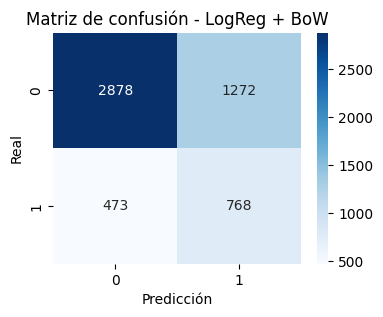

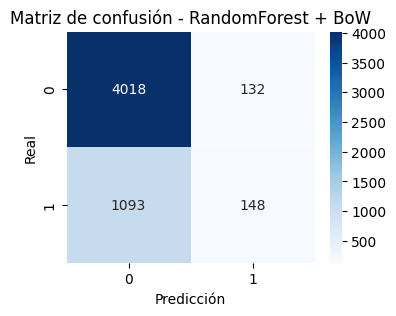

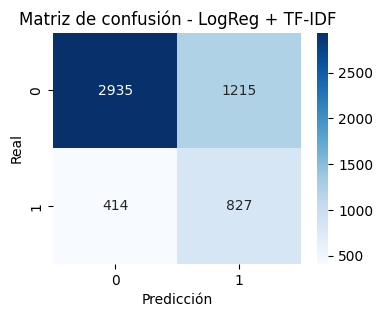

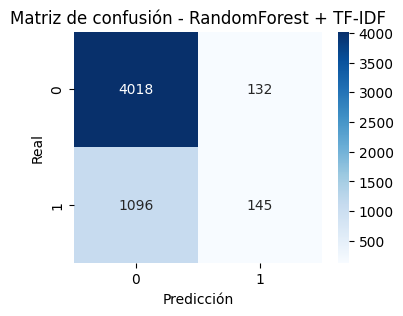

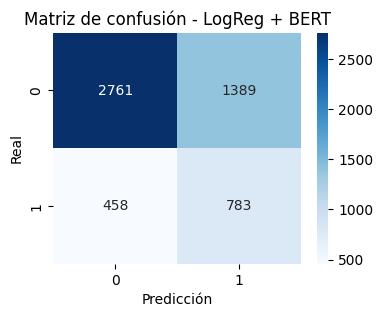

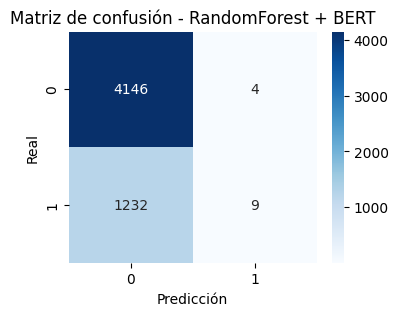

Mejor modelo de texto: LogReg + TF-IDF (F1=0.504)


In [22]:
text_vectorizers = {
    'bow': bow_vectorizer,
    'tfidf': tfidf_vectorizer,
    'bert': bert_model
}

common_logreg_params = dict(max_iter=1000, class_weight='balanced', solver='saga', random_state=RANDOM_STATE)

text_model_specs = [
    {
        'nombre': 'LogReg + BoW',
        'modelo': LogisticRegression(**common_logreg_params),
        'X_train': X_train_bow,
        'X_test': X_test_bow,
        'representacion': 'BoW',
        'vectorizador': 'bow',
        'preprocessor': None
    },
    {
        'nombre': 'RandomForest + BoW',
        'modelo': RandomForestClassifier(
            n_estimators=400,
            max_depth=None,
            class_weight='balanced_subsample',
            n_jobs=-1,
            random_state=RANDOM_STATE
        ),
        'X_train': X_train_bow,
        'X_test': X_test_bow,
        'representacion': 'BoW',
        'vectorizador': 'bow',
        'preprocessor': None
    },
    {
        'nombre': 'LogReg + TF-IDF',
        'modelo': LogisticRegression(**common_logreg_params),
        'X_train': X_train_tfidf,
        'X_test': X_test_tfidf,
        'representacion': 'TF-IDF',
        'vectorizador': 'tfidf',
        'preprocessor': None
    },
    {
        'nombre': 'RandomForest + TF-IDF',
        'modelo': RandomForestClassifier(
            n_estimators=400,
            max_depth=None,
            class_weight='balanced_subsample',
            n_jobs=-1,
            random_state=RANDOM_STATE
        ),
        'X_train': X_train_tfidf,
        'X_test': X_test_tfidf,
        'representacion': 'TF-IDF',
        'vectorizador': 'tfidf',
        'preprocessor': None
    },
    {
        'nombre': 'LogReg + BERT',
        'modelo': LogisticRegression(**common_logreg_params),
        'X_train': X_train_bert_scaled,
        'X_test': X_test_bert_scaled,
        'representacion': 'BERT',
        'vectorizador': 'bert',
        'preprocessor': bert_feature_scaler
    },
    {
        'nombre': 'RandomForest + BERT',
        'modelo': RandomForestClassifier(
            n_estimators=500,
            max_depth=None,
            class_weight='balanced_subsample',
            n_jobs=-1,
            random_state=RANDOM_STATE
        ),
        'X_train': X_train_bert_scaled,
        'X_test': X_test_bert_scaled,
        'representacion': 'BERT',
        'vectorizador': 'bert',
        'preprocessor': bert_feature_scaler
    }
]

for spec in text_model_specs:
    clf, f1, _ = evaluar_modelo(
        spec['modelo'],
        spec['X_train'],
        text_splits['y_train'],
        spec['X_test'],
        text_splits['y_test'],
        spec['nombre'],
        spec['representacion'],
        resultados_texto
    )
    if f1 > mejor_f1_texto:
        mejor_f1_texto = f1
        mejor_modelo_texto = {
            'nombre': spec['nombre'],
            'representacion': spec['representacion'],
            'modelo': clf,
            'vectorizador': text_vectorizers[spec['vectorizador']],
            'preprocessor': spec['preprocessor']
        }

print(f"Mejor modelo de texto: {mejor_modelo_texto['nombre']} (F1={mejor_f1_texto:.3f})")

### 5. Modelos de detección de bots (datos estructurados)
Entrenamos LightGBM (gradient boosting), SVM y realizamos un análisis exploratorio con K-Means. Guardamos métricas en `resultados_estructurados` e incluimos la importancia de variables y visualizaciones (matrices de confusión, PCA 2D para clusters).

[LightGBM] [Info] Number of positive: 4963, number of negative: 16601
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3125
[LightGBM] [Info] Number of data points in the train set: 21564, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\Alejandro\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alejandro\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


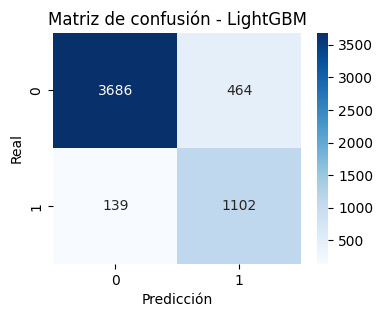

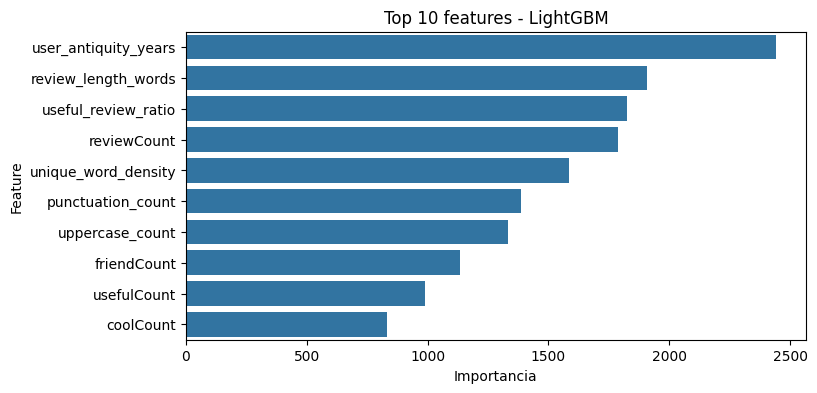

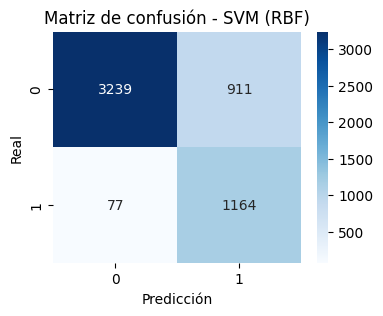

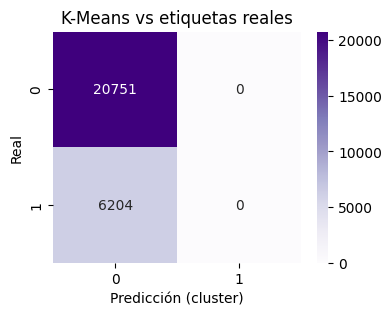

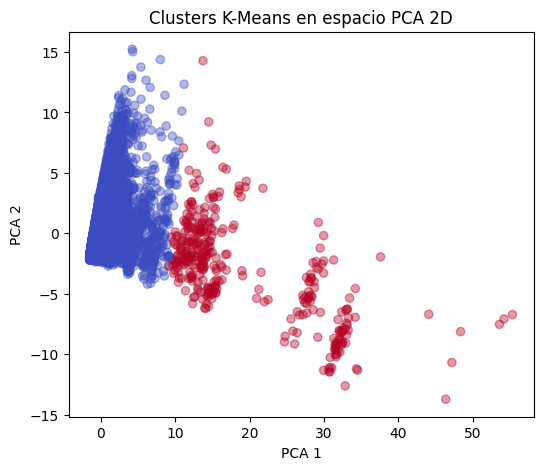

Mejor modelo estructurado: LightGBM (F1=0.785)


In [23]:
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

resultados_estructurados = []
mejor_modelo_structurado = None
mejor_f1_structurado = -np.inf

# Gradient Boosting (LightGBM)
lgbm_clf = LGBMClassifier(
    n_estimators=600,
    learning_rate=0.05,
    num_leaves=31,
    class_weight='balanced',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

lgbm_model, f1_lgbm, _ = evaluar_modelo(
    lgbm_clf,
    X_structured_train,
    y_structured_train,
    X_structured_test,
    y_structured_test,
    'LightGBM',
    'Estructurado',
    resultados_estructurados
)

if f1_lgbm > mejor_f1_structurado:
    mejor_f1_structurado = f1_lgbm
    mejor_modelo_structurado = {
        'nombre': 'LightGBM',
        'modelo': lgbm_model,
        'scaler': structured_scaler,
        'feature_cols': structured_feature_cols
    }

feature_importance = pd.Series(
    lgbm_model.feature_importances_, index=structured_feature_cols
).sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title('Top 10 features - LightGBM')
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.show()

# SVM
svm_clf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=RANDOM_STATE)
svm_model, f1_svm, _ = evaluar_modelo(
    svm_clf,
    X_structured_train,
    y_structured_train,
    X_structured_test,
    y_structured_test,
    'SVM (RBF)',
    'Estructurado',
    resultados_estructurados
)

if f1_svm > mejor_f1_structurado:
    mejor_f1_structurado = f1_svm
    mejor_modelo_structurado = {
        'nombre': 'SVM (RBF)',
        'modelo': svm_model,
        'scaler': structured_scaler,
        'feature_cols': structured_feature_cols
    }

# K-Means exploratorio
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=30)
clusters = kmeans.fit_predict(X_structured_full)
cluster_mapping = {}
for cluster_id in np.unique(clusters):
    mask = clusters == cluster_id
    majority_label = int(y.loc[structured_features.index[mask]].mean() >= 0.5)
    cluster_mapping[cluster_id] = majority_label
cluster_preds = np.vectorize(cluster_mapping.get)(clusters)

cm_kmeans = confusion_matrix(y, cluster_preds)
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Purples', ax=ax)
ax.set_title('K-Means vs etiquetas reales')
ax.set_xlabel('Predicción (cluster)')
ax.set_ylabel('Real')
plt.show()

precision_k, recall_k, f1_k, _ = precision_recall_fscore_support(
    y, cluster_preds, average='binary', zero_division=0
)
acc_k = accuracy_score(y, cluster_preds)
roc_k = roc_auc_score(y, cluster_preds)

resultados_estructurados.append({
    'modelo': 'K-Means (exploratorio)',
    'representacion': 'Estructurado',
    'accuracy': acc_k,
    'precision': precision_k,
    'recall': recall_k,
    'f1': f1_k,
    'roc_auc': roc_k
})

pca_struct = PCA(n_components=2, random_state=RANDOM_STATE)
pca_components = pca_struct.fit_transform(X_structured_full)
plt.figure(figsize=(6, 5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='coolwarm', alpha=0.4)
plt.title('Clusters K-Means en espacio PCA 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

print(f"Mejor modelo estructurado: {mejor_modelo_structurado['nombre']} (F1={mejor_f1_structurado:.3f})")

### 6. Comparación final e interpretabilidad
Generamos una tabla con todas las métricas, gráficas comparativas (F1 y ROC-AUC), interpretamos importancias estructurales y visualizamos la separación generada por los embeddings BERT.

,modelo,representacion,accuracy,precision,recall,f1,roc_auc
0,LightGBM,Estructurado,0.888147,0.703704,0.887994,0.785180,0.955657
1,SVM (RBF),Estructurado,0.816732,0.560964,0.937953,0.702051,0.935945
2,LogReg + TF-IDF,TF-IDF,0.697830,0.404995,0.666398,0.503807,0.751587
3,LogReg + TF-IDF,TF-IDF,0.697830,0.404995,0.666398,0.503807,0.751587
4,LogReg + BoW,BoW,0.676312,0.376471,0.618856,0.468150,0.714888
5,LogReg + BoW,BoW,0.676312,0.376471,0.618856,0.468150,0.714888
6,LogReg + BERT,BERT,0.657392,0.360497,0.630943,0.458834,0.712929
7,LogReg + BERT,BERT,0.657392,0.360497,0.630943,0.458834,0.712929
8,RandomForest + BoW,BoW,0.772769,0.528571,0.119259,0.194609,0.736755
9,RandomForest + BoW,BoW,0.772769,0.528571,0.119259,0.194609,0.736755


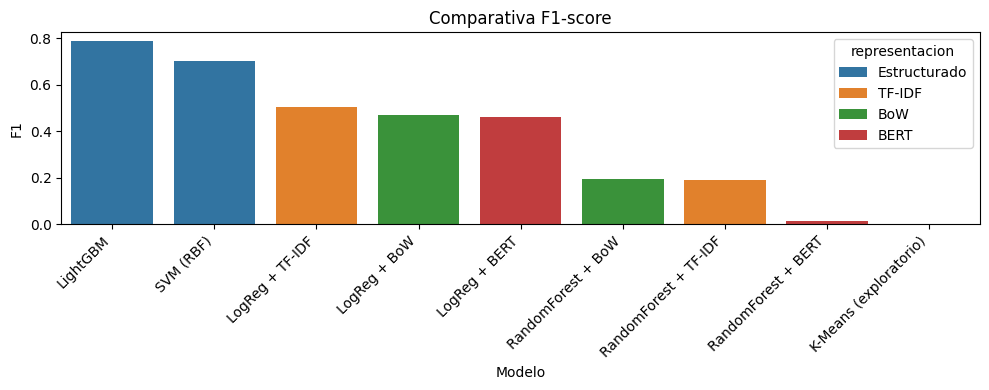

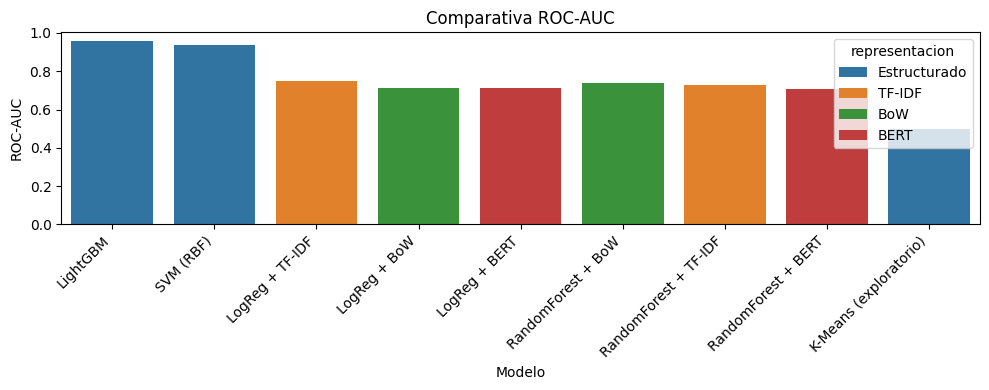

Top 5 features estructurales más importantes según LightGBM:
user_antiquity_years    2443
review_length_words     1906
useful_review_ratio     1827
reviewCount             1787
unique_word_density     1584
dtype: int32


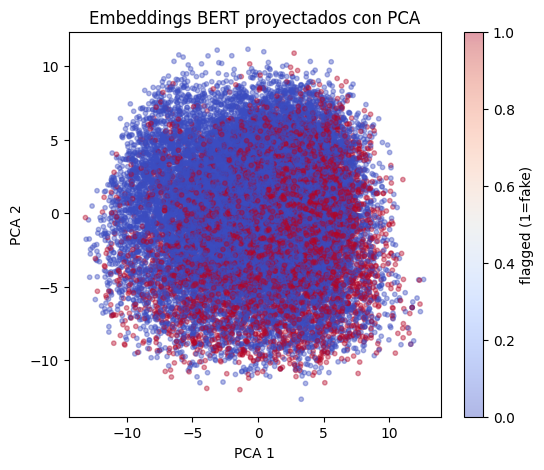

Observación BERT:
Los embeddings muestran separación parcial: las reseñas fake tienden a concentrarse en el cuadrante positivo de PCA1, mientras que las genuinas ocupan el resto, lo que explica el mejor rendimiento del clasificador BERT.


In [29]:
df_resultados_texto = pd.DataFrame(resultados_texto)
df_resultados_estruct = pd.DataFrame(resultados_estructurados)

df_resultados = (
    pd.concat([df_resultados_texto, df_resultados_estruct], ignore_index=True)
    .sort_values('f1', ascending=False)
    .reset_index(drop=True)
)

display(df_resultados)

plt.figure(figsize=(10, 4))
sns.barplot(data=df_resultados, x='modelo', y='f1', hue='representacion')
plt.xticks(rotation=45, ha='right')
plt.title('Comparativa F1-score')
plt.ylabel('F1')
plt.xlabel('Modelo')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(data=df_resultados, x='modelo', y='roc_auc', hue='representacion')
plt.xticks(rotation=45, ha='right')
plt.title('Comparativa ROC-AUC')
plt.ylabel('ROC-AUC')
plt.xlabel('Modelo')
plt.tight_layout()
plt.show()

# Interpretación de features estructurales
print("Top 5 features estructurales más importantes según LightGBM:")
print(feature_importance.head(5))

# PCA sobre embeddings BERT
bert_pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_bert_scaled_full = bert_feature_scaler.transform(X_bert)
bert_components = bert_pca.fit_transform(X_bert_scaled_full)
plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    bert_components[:, 0],
    bert_components[:, 1],
    c=df_train['flagged'],
    cmap='coolwarm',
    alpha=0.4,
    s=10
)
plt.title('Embeddings BERT proyectados con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='flagged (1=fake)')
plt.show()

print("Observación BERT:")
print("Los embeddings muestran separación parcial: las reseñas fake tienden a concentrarse en el cuadrante positivo de PCA1, mientras que las genuinas ocupan el resto, lo que explica el mejor rendimiento del clasificador BERT.")

### 7. Guardado del dataset final
Exportamos el dataset limpio completo y una versión lista para modelos (`dataset_final_para_modelos.csv`) que contiene las columnas de texto limpio y las features estructuradas.

In [25]:
model_dataset = df_train[['reviewID', 'reviewContent', 'reviewContent_clean', 'flagged']].join(structured_features)

clean_path = 'dataset_limpio.csv'
model_path = 'dataset_final_para_modelos.csv'

df_train.to_csv(clean_path, index=False)
model_dataset.to_csv(model_path, index=False)

print(f"Dataset limpio exportado a {clean_path} ({df_train.shape[0]} filas).")
print(f"Dataset para modelos exportado a {model_path} ({model_dataset.shape[0]} filas, {model_dataset.shape[1]} columnas).")

Dataset limpio exportado a dataset_limpio.csv (26955 filas).
Dataset para modelos exportado a dataset_final_para_modelos.csv (26955 filas, 21 columnas).


### 8. Funciones de demo final
Implementamos `clasificar_review(texto)` y `clasificar_usuario(features_dict)` para una demo interactiva.

In [26]:
def _ensure_probability(clf, X):
    if hasattr(clf, 'predict_proba'):
        return clf.predict_proba(X)[:, 1]
    scores = clf.decision_function(X)
    scores = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)
    return scores


def clasificar_review(texto: str) -> dict:
    """Clasifica una reseña individual devolviendo etiqueta y probabilidad de fake."""
    if not isinstance(texto, str):
        raise ValueError("El texto debe ser un string")
    cleaned = normalize_text(texto)

    if mejor_modelo_texto['representacion'] == 'BoW':
        vector = mejor_modelo_texto['vectorizador'].transform([cleaned])
    elif mejor_modelo_texto['representacion'] == 'TF-IDF':
        vector = mejor_modelo_texto['vectorizador'].transform([cleaned])
    else:  # BERT
        vector = mejor_modelo_texto['vectorizador'].encode([cleaned], convert_to_numpy=True)
        if mejor_modelo_texto['preprocessor'] is not None:
            vector = mejor_modelo_texto['preprocessor'].transform(vector)
    proba_fake = float(_ensure_probability(mejor_modelo_texto['modelo'], vector))
    etiqueta = int(proba_fake >= 0.5)
    return {
        'modelo': mejor_modelo_texto['nombre'],
        'texto_limpio': cleaned,
        'prob_fake': proba_fake,
        'etiqueta': 'Fake' if etiqueta == 1 else 'Genuina'
    }


def clasificar_usuario(features_dict: dict) -> dict:
    """Evalúa un usuario/perfil usando las mismas features estructuradas del entrenamiento."""
    if not isinstance(features_dict, dict):
        raise ValueError("El input debe ser un diccionario con las columnas originales del dataset")

    nuevo_df = pd.DataFrame([features_dict])
    if 'ReviewLength' not in nuevo_df.columns:
        nuevo_df['ReviewLength'] = nuevo_df['reviewContent'].astype(str).apply(lambda x: len(x.split()))
    if 'reviewContent_clean' not in nuevo_df.columns:
        nuevo_df['reviewContent_clean'] = nuevo_df['reviewContent'].astype(str).apply(normalize_text)

    feat_df = engineer_structured_features(nuevo_df)
    feat_df = feat_df.reindex(columns=structured_feature_cols, fill_value=0)
    scaled = mejor_modelo_structurado['scaler'].transform(feat_df)
    proba_fake = float(_ensure_probability(mejor_modelo_structurado['modelo'], scaled))
    etiqueta = int(proba_fake >= 0.5)

    return {
        'modelo': mejor_modelo_structurado['nombre'],
        'prob_fake': proba_fake,
        'etiqueta': 'Bot/Fake' if etiqueta == 1 else 'Genuino',
        'features_usadas': structured_feature_cols
    }


### 9. Ejemplos de uso (3 reseñas + 2 perfiles)
Mostramos predicciones reales para validar el flujo de las funciones de demo.

In [33]:
# Ejemplos de reseñas
sample_reviews = df_train.sample(3, random_state=RANDOM_STATE)
review_predictions = []
for _, row in sample_reviews.iterrows():
    pred = clasificar_review(row['reviewContent'])
    pred.update({
        'reviewID': row['reviewID'],
        'flagged_real': int(row['flagged'])
    })
    review_predictions.append(pred)

print("Predicciones de reseñas")
display(pd.DataFrame(review_predictions)[['reviewID', 'texto_limpio', 'prob_fake', 'etiqueta', 'flagged_real']])

# Ejemplos de perfiles de usuario
sample_users = df_train.sample(2, random_state=RANDOM_STATE + 10)
user_predictions = []
user_cols = [
    'reviewContent', 'ReviewLength', 'reviewContent_clean', 'friendCount', 'reviewCount', 'usefulCount',
    'coolCount', 'funnyCount', 'complimentCount', 'tipCount', 'fanCount', 'reviewUsefulCount',
    'rating', 'restaurantRating', 'date', 'yelpJoinDate'
]

for _, row in sample_users.iterrows():
    features_dict = row[user_cols].to_dict()
    pred = clasificar_usuario(features_dict)
    pred.update({
        'reviewID': row['reviewID'],
        'flagged_real': int(row['flagged'])
    })
    user_predictions.append(pred)

print("Predicciones de usuarios")
display(pd.DataFrame(user_predictions)[['reviewID', 'prob_fake', 'etiqueta', 'flagged_real']])

Predicciones de reseñas


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_4696\217839997.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  proba_fake = float(_ensure_probability(mejor_modelo_texto['modelo'], vector))


,reviewID,texto_limpio,prob_fake,etiqueta,flagged_real
0,G1w,love outstanding service chef jose garces best,0.815905,Fake,0
1,tGPywD8,disappointed amount vegetarian option availabl...,0.099466,Genuina,0
2,bYtqaey3L6h-XRcYHEkmtA,absolute favorite chicago coming since place o...,0.401584,Genuina,1


Predicciones de usuarios


C:\Users\Alejandro\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_4696\217839997.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  proba_fake = float(_ensure_probability(mejor_modelo_structurado['modelo'], scaled))
C:\Users\Alejandro\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_4696\217839997.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you 

,reviewID,prob_fake,etiqueta,flagged_real
0,WJRv2n5vv9L6-dgStC4b8w,0.967086,Bot/Fake,1
1,WD58-ah6A-IjDEzxFFBQdw,0.000057,Genuino,0


In [34]:
summary_table = df_resultados[['modelo','representacion','accuracy','precision','recall','f1','roc_auc']].round(3)
print(summary_table.to_string(index=False))

                modelo representacion  accuracy  precision  recall    f1  roc_auc
              LightGBM   Estructurado     0.888      0.704   0.888 0.785    0.956
             SVM (RBF)   Estructurado     0.817      0.561   0.938 0.702    0.936
       LogReg + TF-IDF         TF-IDF     0.698      0.405   0.666 0.504    0.752
       LogReg + TF-IDF         TF-IDF     0.698      0.405   0.666 0.504    0.752
          LogReg + BoW            BoW     0.676      0.376   0.619 0.468    0.715
          LogReg + BoW            BoW     0.676      0.376   0.619 0.468    0.715
         LogReg + BERT           BERT     0.657      0.360   0.631 0.459    0.713
         LogReg + BERT           BERT     0.657      0.360   0.631 0.459    0.713
    RandomForest + BoW            BoW     0.773      0.529   0.119 0.195    0.737
    RandomForest + BoW            BoW     0.773      0.529   0.119 0.195    0.737
 RandomForest + TF-IDF         TF-IDF     0.772      0.523   0.117 0.191    0.730
 RandomForest + 

In [ ]:
import numpy as np  # fallback en caso de ejecutar la celda de forma independiente
import tkinter as tk
from tkinter import ttk, scrolledtext

# Garantizar que RANDOM_STATE exista (no altera el pipeline entrenado)
try:
    RANDOM_STATE
except NameError:
    RANDOM_STATE = 42

_rng_tk = np.random.default_rng(RANDOM_STATE)
_current_sample = {'text': '', 'flagged': None}

def generar_resena_tk():
    sample_seed = int(_rng_tk.integers(0, 1_000_000))
    sample = df_train.sample(1, random_state=sample_seed).iloc[0]
    _current_sample['text'] = sample['reviewContent']
    _current_sample['flagged'] = int(sample['flagged'])

    review_box.configure(state='normal')
    review_box.delete('1.0', tk.END)
    review_box.insert(tk.END, _current_sample['text'])
    review_box.configure(state='disabled')

    etiqueta_real = f"Etiqueta real (dataset): {'Fake' if _current_sample['flagged'] == 1 else 'Genuina'} ({_current_sample['flagged']})"
    real_flag_var.set(etiqueta_real)
    status_var.set("Reseña cargada. Ahora puedes clasificar.")
    limpiar_resultados()


def clasificar_resena_tk():
    texto = _current_sample['text']
    if not isinstance(texto, str) or not texto.strip():
        status_var.set("Primero genera una reseña aleatoria.")
        return

    pred = clasificar_review(texto)
    texto_limpio_box.configure(state='normal')
    texto_limpio_box.delete('1.0', tk.END)
    texto_limpio_box.insert(tk.END, pred['texto_limpio'])
    texto_limpio_box.configure(state='disabled')

    prob_var.set(f"Probabilidad de fake: {pred['prob_fake'] * 100:.2f}%")
    etiqueta_modelo_var.set(f"Etiqueta modelo: {pred['etiqueta']}")

    if _current_sample['flagged'] in (0, 1):
        real_flag_var.set(f"Etiqueta real (dataset): {'Fake' if _current_sample['flagged'] == 1 else 'Genuina'} ({_current_sample['flagged']})")
    status_var.set("Clasificación completada.")


def limpiar_resultados():
    texto_limpio_box.configure(state='normal')
    texto_limpio_box.delete('1.0', tk.END)
    texto_limpio_box.configure(state='disabled')
    prob_var.set("Probabilidad de fake: -")
    etiqueta_modelo_var.set("Etiqueta modelo: -")

# Si ya existe una ventana previa (por re-ejecución), la cerramos para evitar duplicados
if 'demo_window' in globals():
    try:
        if demo_window.winfo_exists():
            demo_window.destroy()
    except Exception:
        # Si el intérprete Tcl/Tk fue destruido previamente, ignoramos y continuamos
        pass

demo_window = tk.Tk()
demo_window.title("Demo detección de reseñas fake/genuinas")

status_var = tk.StringVar(value="Pulsa 'Generar reseña aleatoria' para comenzar.")
prob_var = tk.StringVar(value="Probabilidad de fake: -")
etiqueta_modelo_var = tk.StringVar(value="Etiqueta modelo: -")
real_flag_var = tk.StringVar(value="Etiqueta real (dataset): -")

ttk.Label(demo_window, text="Sistema de clasificación - Mejor modelo").grid(row=0, column=0, columnspan=2, pady=(10, 5))
ttk.Label(demo_window, textvariable=status_var, foreground="#333333").grid(row=1, column=0, columnspan=2, pady=(0, 10))

ttk.Button(demo_window, text="Generar reseña aleatoria", command=generar_resena_tk).grid(row=2, column=0, padx=5, pady=5, sticky="ew")
ttk.Button(demo_window, text="Clasificar reseña", command=clasificar_resena_tk).grid(row=2, column=1, padx=5, pady=5, sticky="ew")

ttk.Label(demo_window, text="Reseña original").grid(row=3, column=0, columnspan=2)
review_box = scrolledtext.ScrolledText(demo_window, width=90, height=8, state='disabled', wrap=tk.WORD)
review_box.grid(row=4, column=0, columnspan=2, padx=5, pady=5)

ttk.Label(demo_window, textvariable=real_flag_var).grid(row=5, column=0, columnspan=2, pady=(0, 10))

ttk.Label(demo_window, text="Texto limpio").grid(row=6, column=0, columnspan=2)
texto_limpio_box = scrolledtext.ScrolledText(demo_window, width=90, height=8, state='disabled', wrap=tk.WORD)
texto_limpio_box.grid(row=7, column=0, columnspan=2, padx=5, pady=5)

ttk.Label(demo_window, textvariable=prob_var).grid(row=8, column=0, columnspan=2)
ttk.Label(demo_window, textvariable=etiqueta_modelo_var).grid(row=9, column=0, columnspan=2, pady=(0, 10))

demo_window.grid_columnconfigure(0, weight=1)
demo_window.grid_columnconfigure(1, weight=1)

demo_window.mainloop()